<a href="https://colab.research.google.com/github/itberrios/CV_tracking/blob/main/MARLMOT/MARLMOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MARLMOT**

This notebook contains a basic MARLMOT implementation. The base tracker will be SORT and Multi-Agent Policy Parameterized by a Neural Network will be used to manage each track.

The Policy will be trained on the MOT 2015 challenge

In [1]:
!wget https://motchallenge.net/data/MOT15.zip

--2023-03-12 01:23:10--  https://motchallenge.net/data/MOT15.zip
Resolving motchallenge.net (motchallenge.net)... 131.159.19.34, 2a09:80c0:18::1034
Connecting to motchallenge.net (motchallenge.net)|131.159.19.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1310994213 (1.2G) [application/zip]
Saving to: ‘MOT15.zip’

MOT15.zip           100%[===================>]   1.22G  13.6MB/s    in 1m 40s  

2023-03-12 01:24:50 (12.6 MB/s) - ‘MOT15.zip’ saved [1310994213/1310994213]



In [2]:
!jar xf MOT15.zip

In [3]:
import os
from glob import glob
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt


%matplotlib inline
plt.rcParams["figure.figsize"] = (20, 10)

In [20]:
TRAIN_FOLDERS = r"/content/MOT15/train"
TRAIN_NAMES = next(iter(os.walk(TRAIN_FOLDERS)))[1]
TRAIN_NAMES

['TUD-Campus',
 'Venice-2',
 'KITTI-17',
 'ADL-Rundle-6',
 'ETH-Pedcross2',
 'TUD-Stadtmitte',
 'KITTI-13',
 'ETH-Bahnhof',
 'ETH-Sunnyday',
 'ADL-Rundle-8',
 'PETS09-S2L1']

In [30]:
GT_COLS = ["frame", "id", "bb_left", "bb_top", "bb_width", "bb_height"]

In [34]:
train_folder = os.path.join(TRAIN_FOLDERS, TRAIN_NAMES[0])
gt = pd.read_csv(os.path.join(train_folder, "gt/gt.txt"), usecols=[0,1,2,3,4,5], 
                 header=None)
gt.columns = GT_COLS
gt.head()

,frame,id,bb_left,bb_top,bb_width,bb_height
0,1,1,399,182,121.0,229.0
1,1,2,282,201,92.0,184.0
2,1,3,63,153,82.0,288.0
3,1,4,192,206,62.0,137.0
4,1,5,125,209,74.0,157.0


In [225]:
def get_color(idx):
    """ Converts an index to a color
        """
    blue = idx*30 % 256
    green = idx*103 % 256
    red = idx*50 % 256
    return (red, green, blue)
  

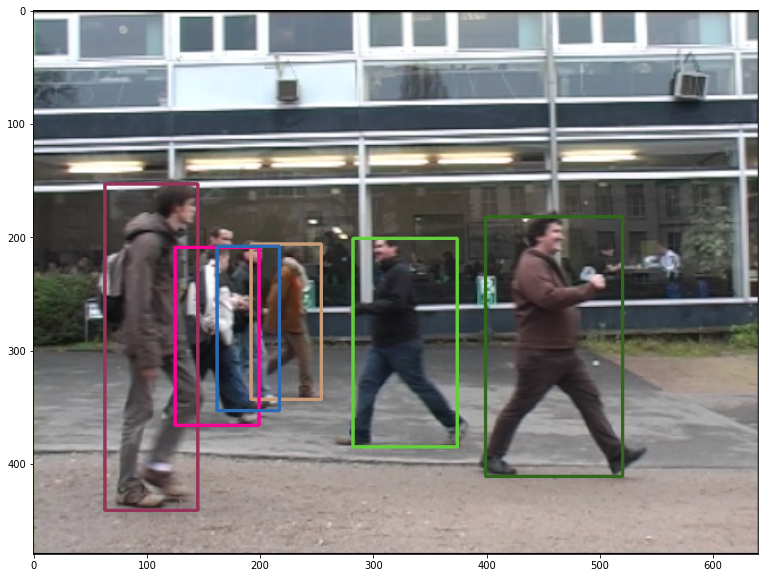

In [227]:
train_images = sorted(glob(os.path.join(train_folder, "**/*.jpg")))

# get current frame
idx = 0
current_tracks = gt.loc[gt.frame == (idx + 1), :]
frame = cv2.cvtColor(cv2.imread(train_images[idx]), cv2.COLOR_BGR2RGB)

# draw ground truth on frame
for id in current_tracks.id:
    track = current_tracks[current_tracks.id == id]

    color = get_color(id)

    pt1 = track.iloc[0, 2:4].to_numpy().astype(int)
    pt2 = pt1 + track.iloc[0, 4:6].to_numpy().round().astype(int)
    frame = cv2.rectangle(frame, pt1, pt2, color, 2)


# display frame
plt.imshow(frame)

